# Data Description
* We have 4 quarters of ride data of the company 'EasyRide'.
* The data is from the last 3 quarters of 2019, and the first quarter of 2020
* The objective is to understand the differences in the ride patterns of the members and casual riders, so that more number of casual riders are converted into members . 

In [96]:
## Import libraries, and read data files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

FILES_PATH = 'C:\Dev\ML\Projects\Google Course Capstone\Data'
dataFiles = os.listdir(FILES_PATH)

for file in dataFiles :
    quarter = file.split('_')[3].split('.')[0]
    globals()['%s' % quarter] = pd.read_csv(FILES_PATH+'\\'+file)

# Data Validation

* As the column names are different for each sheet, they have to be standardised according to the latest data.
* All the data will be combined into one master sheet once the columns are validated.


In [97]:
## Function to check if all the sheets have the same column names

def check_columns(Q1,Q2,Q3,Q4):
    i=1
    cols = set(Q1.columns)
    print(cols)

    for quarter in [Q1,Q2,Q3,Q4]:  
        columns = set(quarter.columns)
        if cols != columns :
            print('Q1 and Q'+str(i)+' have different columns')
            print(columns)
        else :
            print('Q1 and Q'+str(i)+' have same columns')
        print('\n')
        i = i+1       
             
    

In [98]:
check_columns(Q1,Q2,Q3,Q4)

{'ride_id', 'start_station_id', 'ended_at', 'started_at', 'end_lng', 'rideable_type', 'end_lat', 'end_station_id', 'end_station_name', 'member_casual', 'start_lng', 'start_station_name', 'start_lat'}
Q1 and Q1 have same columns


Q1 and Q2 have different columns
{'01 - Rental Details Rental ID', '05 - Member Details Member Birthday Year', '01 - Rental Details Local End Time', '02 - Rental End Station ID', '01 - Rental Details Local Start Time', 'User Type', '02 - Rental End Station Name', '01 - Rental Details Duration In Seconds Uncapped', '03 - Rental Start Station Name', 'Member Gender', '01 - Rental Details Bike ID', '03 - Rental Start Station ID'}


Q1 and Q3 have different columns
{'tripduration', 'to_station_id', 'to_station_name', 'start_time', 'from_station_id', 'gender', 'birthyear', 'usertype', 'from_station_name', 'end_time', 'bikeid', 'trip_id'}


Q1 and Q4 have different columns
{'tripduration', 'to_station_id', 'to_station_name', 'start_time', 'from_station_id', 'gender',

In [99]:
## Rename columns and make all data consistent with Q1 2020

Q2.rename(columns = {'01 - Rental Details Rental ID':'ride_id',
                     '01 - Rental Details Bike ID':'rideable_type',
                     '01 - Rental Details Local Start Time':'started_at',
                     '01 - Rental Details Local End Time' : 'ended_at',
                      '03 - Rental Start Station Name':'start_station_name',
                     '03 - Rental Start Station ID':'start_station_id',
                    '02 - Rental End Station Name':'end_station_name',
                     '02 - Rental End Station ID':'end_station_id',
                     'User Type':'member_casual'},inplace = True)

Q3.rename(columns = {'trip_id':'ride_id',
                     'bikeid':'rideable_type',
                     'start_time':'started_at',
                     'end_time':'ended_at',
                    'from_station_name':'start_station_name',
                    'from_station_id':'start_station_id',
                    'to_station_name':'end_station_name',
                    'to_station_id':'end_station_id',
                    'usertype':'member_casual'},inplace = True)

Q4.rename(columns = {'trip_id':'ride_id',
                     'bikeid':'rideable_type',
                     'start_time':'started_at',
                     'end_time':'ended_at',
                    'from_station_name':'start_station_name',
                    'from_station_id':'start_station_id',
                    'to_station_name':'end_station_name',
                    'to_station_id':'end_station_id',
                    'usertype':'member_casual'},inplace = True)


In [100]:
## Dropping unnecessary columns from all sheets

Q1 = Q1.drop(columns = ['start_lat','start_lng','end_lat','end_lng'],errors='ignore')
Q2 = Q2.drop(columns=['01 - Rental Details Duration In Seconds Uncapped','Member Gender','05 - Member Details Member Birthday Year'],errors='ignore')
Q3 = Q3.drop(columns=['tripduration','gender','birthyear'],errors='ignore')
Q4 = Q4.drop(columns=['tripduration','gender','birthyear'],errors='ignore')

In [101]:
## Checking for column consistency again

check_columns(Q1,Q2,Q3,Q4)

{'ride_id', 'start_station_id', 'ended_at', 'started_at', 'rideable_type', 'end_station_id', 'end_station_name', 'member_casual', 'start_station_name'}
Q1 and Q1 have same columns


Q1 and Q2 have same columns


Q1 and Q3 have same columns


Q1 and Q4 have same columns




In [102]:
## Combining all the sheets into one master sheet

frames = [Q2,Q3,Q4,Q1]
data = pd.concat(frames,sort=False,ignore_index=True)
data.head()

,ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81,Daley Center Plaza,56.0,Desplaines St & Kinzie St,Subscriber
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317,Wood St & Taylor St,59.0,Wabash Ave & Roosevelt Rd,Subscriber
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283,LaSalle St & Jackson Blvd,174.0,Canal St & Madison St,Subscriber
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26,McClurg Ct & Illinois St,133.0,Kingsbury St & Kinzie St,Subscriber
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202,Halsted St & 18th St,129.0,Blue Island Ave & 18th St,Subscriber


# Data Cleanup

* There are 3879822 rows , and 9 columns
* We have to check for any missing values, incorrect entries, and remove unnecessary entries .
* Data types in all columns has to be made consistent

In [103]:
## Shape of the dataframe

print('Number of rows : '+ str(data.shape[0]) + '\nNumber of columns : '+ str(data.shape[1])+'\n')
print('Getting data information \n')
data.info()

Number of rows : 3879822
Number of columns : 9

Getting data information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3879822 entries, 0 to 3879821
Data columns (total 9 columns):
ride_id               object
started_at            object
ended_at              object
rideable_type         object
start_station_id      int64
start_station_name    object
end_station_id        float64
end_station_name      object
member_casual         object
dtypes: float64(1), int64(1), object(7)
memory usage: 266.4+ MB


In [104]:
## Checking if any null objects exist column wise

data.isnull().sum(axis=0)

ride_id               0
started_at            0
ended_at              0
rideable_type         0
start_station_id      0
start_station_name    0
end_station_id        1
end_station_name      1
member_casual         0
dtype: int64

In [105]:
## There is one missing value.

data[data.isnull().any(axis=1)]

,ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
3867361,157EAA4C4A3C8D36,2020-03-16 11:23:36,2020-03-16 11:23:24,docked_bike,675,HQ QR,NaN,NaN,casual


There is only one row with a missing value, and this can be removed as we have enough data .

In [106]:
## Removing the entry

data_copy = data
data = data.drop(data.index[3867361])
data = data.reset_index(drop=True)

* All the columns except start and end times can be converted into type string, and then be typecasted into appropriate data types.
* The columns for ride start and end times will be converted into type 'Datetime'

In [107]:

print('Columns which have data other than string:\n')
wrong_cols = [col for col in data.columns if (data[col].map(type)!=str).any()]
print(wrong_cols)

for col in wrong_cols :
    data[col] = data[col].astype(str)
    

Columns which have data other than string:

['ride_id', 'rideable_type', 'start_station_id', 'end_station_id']


In [108]:
data['member_casual'].value_counts()

Subscriber    2595461
Customer       857474
member         378407
casual          48479
Name: member_casual, dtype: int64

* According to older categorisation, members were named as 'Subscriber', and casual riders were named as 'Customer'.
* This needs to be modified for consistency in analysis

In [109]:
### Replace Subscriber with member, and customer with casual

data['member_casual'][data['member_casual']=='Subscriber'] = 'member'
data['member_casual'][data['member_casual']=='Customer'] = 'casual'



In [110]:
print(str(np.around(data['member_casual'].value_counts(normalize=True).mul(100)[0],2))+ '% of the trips are taken by members, while '+ str(np.around(data['member_casual'].value_counts(normalize=True).mul(100)[1],2))+'% of the trips are taken by Casual riders .')

76.65% of the trips are taken by members, while 23.35% of the trips are taken by Casual riders .


In [111]:
data.head()

,ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81,Daley Center Plaza,56.0,Desplaines St & Kinzie St,member
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317,Wood St & Taylor St,59.0,Wabash Ave & Roosevelt Rd,member
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283,LaSalle St & Jackson Blvd,174.0,Canal St & Madison St,member
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26,McClurg Ct & Illinois St,133.0,Kingsbury St & Kinzie St,member
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202,Halsted St & 18th St,129.0,Blue Island Ave & 18th St,member


In [112]:
## Adding new  columns

data['started_at'] = pd.to_datetime(data['started_at'], format='%Y-%m-%d %H:%M:%S')
data['ended_at'] = pd.to_datetime(data['ended_at'], format='%Y-%m-%d %H:%M:%S')

data['trip_duration'] = (data['ended_at'] -data['started_at']).astype('timedelta64[m]')

data['month'] = data['started_at'].dt.month
data['day'] = data['started_at'].dt.day
data['hour'] = data['started_at'].dt.hour
data['week_day'] = data['started_at'].dt.day_name()

In [113]:
data['trip_duration'].describe()

count    3.879821e+06
mean     2.413742e+01
std      5.151491e+02
min     -5.700000e+01
25%      6.000000e+00
50%      1.100000e+01
75%      2.100000e+01
max      1.564500e+05
Name: trip_duration, dtype: float64

* The minimum trip duration is zero, which means the trip length is negative in some cases .
* These entries can be removed as they are invalid, or were there for maintenance

In [114]:
print("Number of trips with trip negative trip duration is "+ str(len(data[data['trip_duration']<=0])))
data.drop(data[data['trip_duration']<=0].index,inplace=True)
data = data.reset_index(drop=True)

Number of trips with trip negative trip duration is 7683


# Visualization

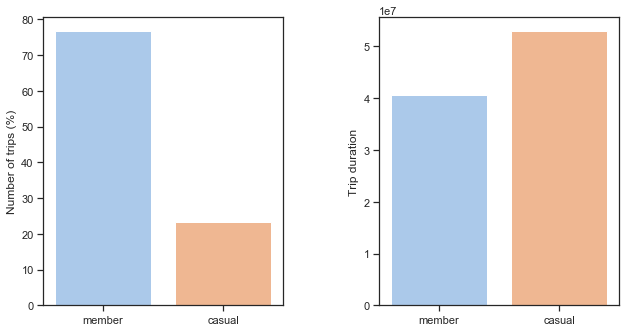

In [115]:
fig, axs = plt.subplots(ncols=2,nrows = 1,figsize=(10,5))

ax1 = axs[0]
ax2 = axs[1]

# plt.suptitle('Analysis of trips with short trip durations (<=1 minute)')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)


sns.set_palette("pastel")
sns.barplot(x=data['member_casual'].value_counts(normalize=True).mul(100).index,y=data['member_casual'].value_counts(normalize=True).mul(100),ax=ax1,order=['member','casual'])
ax1.set_ylabel('Number of trips (%)')

sums = data.groupby(['member_casual'])['trip_duration'].sum().reset_index()
sns.barplot(x = 'member_casual',y='trip_duration',data=sums,ax=ax2,order=['member','casual'])
ax2.set_ylabel('Trip duration')
ax2.set_xlabel('');


* Though members are taking more trips as compared to casual riders, the total number of hours travelled by casual riders is higher than that of members .

* The trip duration is less than 2 in several cases. Trying to check the distribution of such cases. 
* We can check if such rides are disctributed across many stations, or if they are majorly coming from any particular station, which could mean any errenous data .


# Case 1 :
Checking top 5 stations where trip duration is less than equal to one, and start and end station names are the same

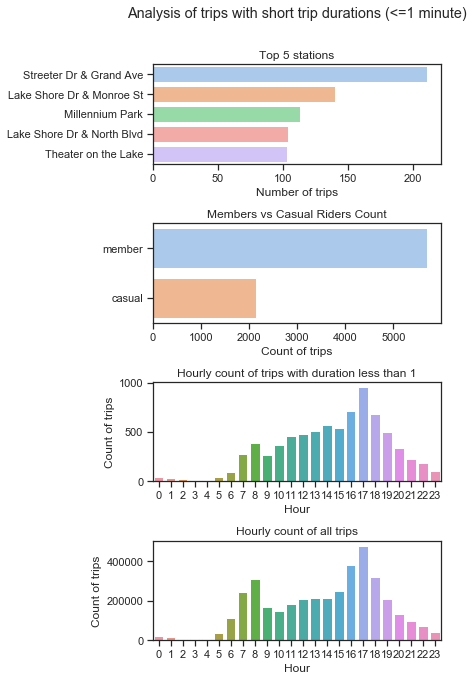

In [116]:
fig, axs = plt.subplots(ncols=1,nrows = 4,figsize=(5,10))

ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]
ax4 = axs[3]

plt.suptitle('Analysis of trips with short trip durations (<=1 minute)')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)


sns.barplot(y=data[(data['trip_duration']<=1) & (data['start_station_name']==data['end_station_name'])]['start_station_name'].value_counts()[:5].index , x=data[(data['trip_duration']<=1) & (data['start_station_name']==data['end_station_name'])]['start_station_name'].value_counts()[:5],ax=ax1)
ax1.set_title('Top 5 stations')
ax1.set_xlabel('Number of trips')

sns.barplot(y=data[(data['trip_duration']<=1) & (data['start_station_name']==data['end_station_name'])]['member_casual'].value_counts().index, x = data[(data['trip_duration']<=1) & (data['start_station_name']==data['end_station_name'])]['member_casual'].value_counts(), ax=ax2 )
ax2.set_title('Members vs Casual Riders Count')
ax2.set_xlabel('Count of trips')

sns.barplot(x=data[(data['trip_duration']<=1) & (data['start_station_name']==data['end_station_name'])]['hour'].value_counts().index, y = data[(data['trip_duration']<=1) & (data['start_station_name']==data['end_station_name'])]['hour'].value_counts(), ax=ax3 )
ax3.set_title('Hourly count of trips with duration less than 1')
ax3.set_xlabel('Hour')
ax3.set_ylabel('Count of trips')

sns.barplot(x=data['hour'].value_counts().index, y = data['hour'].value_counts(), ax=ax4 )
ax4.set_title('Hourly count of all trips')
ax4.set_xlabel('Hour')
ax4.set_ylabel('Count of trips');

# Case 2 :
Checking top 5 stations where trip duration is less than equal to 3

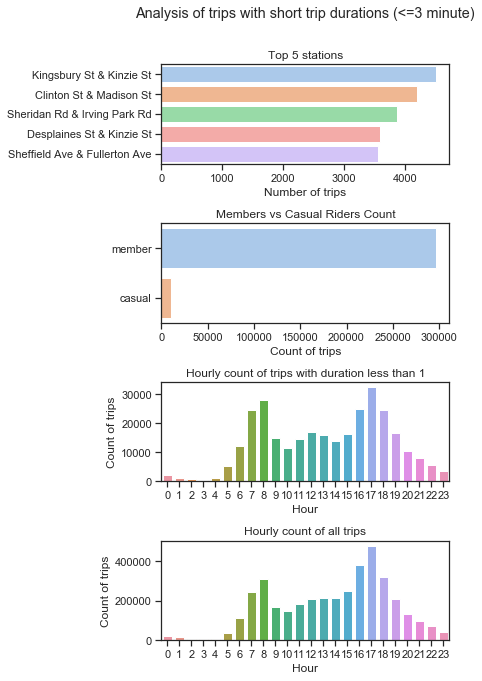

In [117]:
fig, axs = plt.subplots(ncols=1,nrows = 4,figsize=(5,10))

ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]
ax4 = axs[3]

plt.suptitle('Analysis of trips with short trip durations (<=3 minute)')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)


sns.barplot(y=data[(data['trip_duration']<=3)]['start_station_name'].value_counts()[:5].index , x=data[(data['trip_duration']<=3)]['start_station_name'].value_counts()[:5],ax=ax1)
ax1.set_title('Top 5 stations')
ax1.set_xlabel('Number of trips')

sns.barplot(y=data[(data['trip_duration']<=3)]['member_casual'].value_counts().index, x = data[(data['trip_duration']<=3)]['member_casual'].value_counts(), ax=ax2 )
ax2.set_title('Members vs Casual Riders Count')
ax2.set_xlabel('Count of trips')

sns.barplot(x=data[(data['trip_duration']<=3)]['hour'].value_counts().index, y = data[(data['trip_duration']<=3)]['hour'].value_counts(), ax=ax3 )
ax3.set_title('Hourly count of trips with duration less than 1')
ax3.set_xlabel('Hour')
ax3.set_ylabel('Count of trips')

sns.barplot(x=data['hour'].value_counts().index, y = data['hour'].value_counts(), ax=ax4 )
ax4.set_title('Hourly count of all trips')
ax4.set_xlabel('Hour')
ax4.set_ylabel('Count of trips');

* The number of trips with duration less than or equal to 1 minute, and the same start and end stations is not majorly from any particular station, and is distributed almost equally among different stations .

* Most of the short rides are from members

* The hourly pattern for short rides matches the hourly pattern for all rides, except that for the times between 7 A.M to 3 P.M , where percentage of trips is considerably high compared to the surrounding hours for short trips

In [118]:
data[data['start_station_name']=='HQ QR']

,ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,trip_duration,month,day,hour,week_day
3643851,6E381341D8EE0FBE,2020-02-25 10:52:35,2020-02-25 10:53:45,docked_bike,675,HQ QR,675.0,HQ QR,casual,1.0,2,25,10,Tuesday
3744120,895933EAD860D2E2,2020-03-09 14:35:06,2020-03-09 14:43:32,docked_bike,675,HQ QR,675.0,HQ QR,casual,8.0,3,9,14,Monday
3804959,68A492B5ACF882F4,2020-03-09 09:40:57,2020-03-09 09:50:58,docked_bike,675,HQ QR,675.0,HQ QR,casual,10.0,3,9,9,Monday
3813148,FB7BCA0FE2D0993E,2020-03-09 15:33:46,2020-03-09 15:35:35,docked_bike,675,HQ QR,675.0,HQ QR,casual,1.0,3,9,15,Monday


* The modfified data has been saved into an excel sheet for further analysis in tableau .

In [119]:
data.to_csv('C:\Dev\ML\Projects\Google Course Capstone\FinalData.csv')